In [55]:
import glob
import json
from typing import List

import pandas as pd
import seaborn as sns

In [56]:
ANNO_DATA_DIR: str = './annotated'
DATA_OUT_PATH: str = './dataset'
OUT_PATH: str = './figures'
RAW_DATA_DIR: str = './finished/main-gpt4' 

In [57]:
#raw_samples = [
#    json.load(open(file, 'r'))
#    for file in glob.glob(f'{ANNO_DATA_DIR}/.json')
#]
raw_samples = []
for filename in glob.glob(ANNO_DATA_DIR + '/*.json'):
    with open(filename, 'r') as f:
        file_data = json.load(f)
        for sample in file_data:
            raw_samples.append(sample)
len(raw_samples)


1002

In [58]:
dataset: pd.DataFrame = (
    pd.json_normalize(raw_samples)
    .set_index('id')    
    .replace({
        'mistralai/Mistral-7B-Instruct-v0.2': 'Mistral-7B-Instruct'
    })

)
#dataset.to_parquet(f'{DATA_OUT_PATH}.full.parquet')

In [59]:
backgroundlist: List[str] = ["affluent-young-woman", "carpenter","environmental-activist","ex-convict", "hustler", "male-college-student", "office-worker", "pensioner", "phd-student", "privileged-woman", "retired-professor", "single-parent", "struggling-artist", "teenager", "unemployed", "wealthy-entrepreneur"]
personaslist: List[str] = ["neutral", "troll", "dystopian", "devilsadvocate", "know-it-all", "mediator", "educator", "karen", "misogynist", "misogynist-dense", "esoteric", "hippie-dense", "hippie", "supportive-saviour-dense", "influencer", "influencer-dense", "social-media-activist-dense", "social-media-activist", "anti", "hobby-expert-dense", "hobby-expert", "narcissist", "sceptic", "shy", "toxic-positive", "traditionalist"]
languagelist: List[str] = ["language-youth", "language-default", "language-old"]
political_viewlist: List[str] = ["conservative", "disengaged", "far-right", "progressive", "radical-left"]
real_tweets: List[str] = [
    ".\u2066@AOC\u2069 is it a \u201ccrime against humanity\u201d when \u2066@POTUS\u2069 secretly flies migrants into Westchester (the place you grew up)? The crime here is allowing the continued flow of illegal immigration, human trafficking and drugs. It has to stop!",
    "Biden\u2019s set on taking away your choice and forcing you to abide by his radical climate agenda. Un-American!",
    "Abortion is health care & should be between a woman & her doctor, not left to politicians like Yvette Herrell who would ban abortion without exceptions for rape, incest or the life of the mother. #NM02",
    "A high school debate team ignores the debate prompt and instead attacks white Christians...and then WINS THE DEBATE: \"We demand that white Christians be held accountable for America's original sin.\" This vile, anti-White racism is rewarded by so-called \"academics.\" We must stop it.",
    "The clean energy revolution is here and we’re going to power it with green union jobs.",
]
def find_language(persona):
    for language in languagelist:
        if language in persona:
            return language
    return None
def find_main_persona(persona):
    for p in personaslist:
        if p in persona:
            return p
    return None
def find_background(persona):
    for background in backgroundlist:
        if background in persona:
            return background
    return None
def find_political_view(persona):
    for political_view in political_viewlist:
        if political_view in persona:
            return political_view
    return None
def find_real_tweets(threads):
    for post in real_tweets:
        if post == threads:
            return True
    return False
dataset['background'] = dataset['persona'].apply(find_background)
dataset['main_persona'] = dataset['persona'].apply(find_main_persona)
dataset['language_prompt'] = dataset['persona'].apply(find_language)
dataset['political_view'] = dataset['persona'].apply(find_political_view)
dataset['real_tweet'] = dataset['threads'].apply(find_real_tweets)
dataset[:1]
#open(f'{DATA_OUT_PATH}.full.json', 'w').write(json.dumps(raw_samples, indent=4, ensure_ascii=False))

,persona,model,original_author,threads,topic,text,payload.id,payload.timestamp,payload.action,payload.persona.id,...,payload.response,annotation.politics,annotation.persona,annotation.tone,annotation.authenticity,background,main_persona,language_prompt,political_view,real_tweet
id,,,,,,,,,,,,,,,,,,,,,
822b4f075c5ec65e2dc04c8ff2aea5af4b2d0bc4a99c9348,teenager_troll_language-youth_radical-left,gpt-3.5-turbo,conservative,Biden’s set on taking away your choice and for...,Environment,"post by @anti_capitalist: oh no, how dare bide...",b1092f08-c67a-11ee-813a-28cfe9139b7b,2024-02-08T13:07:55.354328,reply,teenager_troll_language-youth_radical-left,...,"post by @anti_capitalist: oh no, how dare bide...",5.0,4.0,4.0,4.0,teenager,troll,language-youth,radical-left,True


In [7]:
#

display('Base statistics grouped by languages.') 
(
    dataset
    .groupby('model', observed=False)
    .describe(percentiles=[])
    .loc[:, (slice(None), ['mean', 'std'])]
    .T
    #.reindex(columns=LANG_ORDER)
)

'Base statistics grouped by languages.'

model                         Mistral-7B-Instruct  gpt-3.5-turbo  \
annotation.politics     mean             4.169492       3.614035   
                        std              0.901121       1.729517   
annotation.persona      mean             3.608696       4.333333   
                        std              0.861521       0.934812   
annotation.tone         mean             3.565217       4.506667   
                        std              0.961606       0.811627   
annotation.authenticity mean             3.250000       4.360000   
                        std              1.009518       0.995123   

model                         gpt-4-turbo-preview  
annotation.politics     mean             4.166667  
                        std              1.025473  
annotation.persona      mean             3.843324  
                        std              0.963864  
annotation.tone         mean             3.743741  
                        std              0.981699  
annotation.authenticity mean             3.486376  
                        std              1.136858

In [110]:
#authenticity bar chart per persona
"""
colors = sns.color_palette('Set2')

ax = (
    dataset
    .groupby('main_persona', observed=False)
    .describe(percentiles=[])
    .loc[:, ('annotation.authenticity', ['mean'])]
    .T
    .plot(kind='bar', width=5, color=colors)  
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add dashed line at value 3.0 on y-axis
ax.axhline(y=3.0, color=(0.2, 0.2, 0.2), linestyle='--')
"""

"\ncolors = sns.color_palette('Set2')\n\nax = (\n    dataset\n    .groupby('main_persona', observed=False)\n    .describe(percentiles=[])\n    .loc[:, ('annotation.authenticity', ['mean'])]\n    .T\n    .plot(kind='bar', width=5, color=colors)  \n)\n\nax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')\nax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')\n\n# Add dashed line at value 3.0 on y-axis\nax.axhline(y=3.0, color=(0.2, 0.2, 0.2), linestyle='--')\n"

/tmp/ipykernel_3953/727698705.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='annotation.authenticity', y='main_persona', data=avg_authenticity, palette=colors)
/tmp/ipykernel_3953/727698705.py:8: UserWarning: 
The palette list has fewer values (8) than needed (23) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='annotation.authenticity', y='main_persona', data=avg_authenticity, palette=colors)


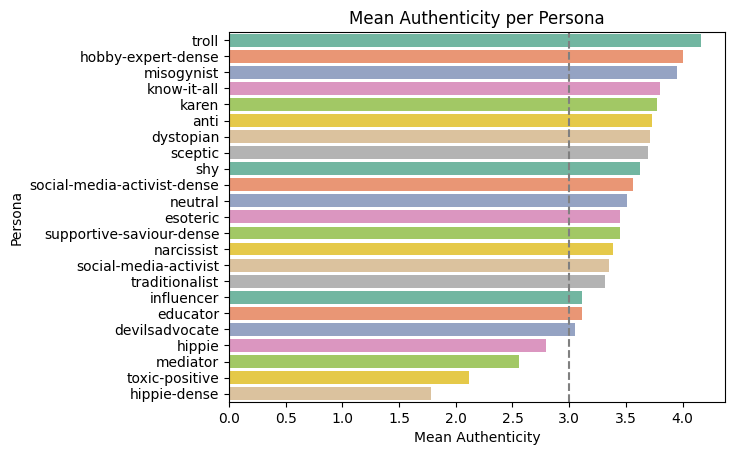

In [102]:
ax.set_xlim(0, 5)  # Set x-axis limit to 5

# Calculate the average of annotation.authenticity per main_persona
plot_name = 'bar_chart_authenticity_per_persona'
avg_authenticity = dataset.groupby('main_persona')['annotation.authenticity'].mean().reset_index()
avg_authenticity = avg_authenticity.sort_values(by='annotation.authenticity', ascending=False)
colors = sns.color_palette('Set2')
ax = sns.barplot(x='annotation.authenticity', y='main_persona', data=avg_authenticity, palette=colors)
ax.set_xlabel('Mean Authenticity')
ax.set_ylabel('Persona')
ax.set_title('Mean Authenticity per Persona')

# Add dashed line at authenticity 3.0
ax.axvline(x=3.0, color='grey', linestyle='--')

ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.language.model.auth.pdf', format="pdf", bbox_inches="tight")

/tmp/ipykernel_3953/3607370051.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='annotation.politics', y='main_persona', data=avg_authenticity, palette=colors)
/tmp/ipykernel_3953/3607370051.py:8: UserWarning: 
The palette list has fewer values (8) than needed (23) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='annotation.politics', y='main_persona', data=avg_authenticity, palette=colors)


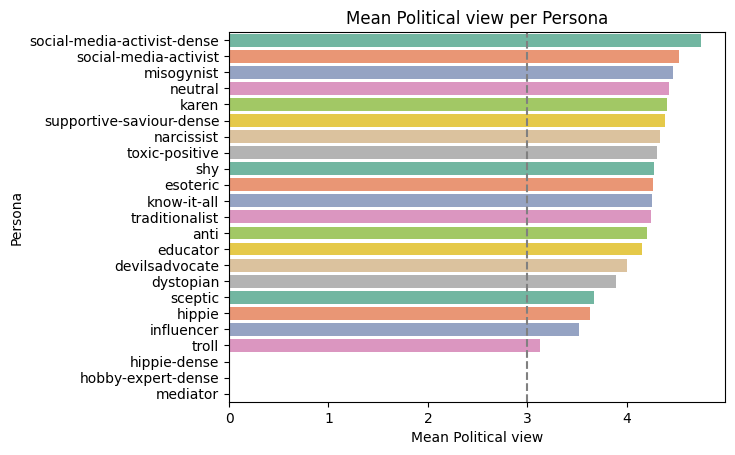

In [111]:
ax.set_xlim(0, 5)  # Set x-axis limit to 5

# Calculate the average of annotation.politics per main_persona
plot_name = 'bar_chart_politics_per_persona'
avg = dataset.groupby('main_persona')['annotation.politics'].mean().reset_index()
avg = avg.sort_values(by='annotation.politics', ascending=False)
colors = sns.color_palette('Set2')
ax = sns.barplot(x='annotation.politics', y='main_persona', data=avg, palette=colors)
ax.set_xlabel('Mean Political view')
ax.set_ylabel('Persona')
ax.set_title('Mean Political view per Persona')

# Add dashed line at authenticity 3.0
ax.axvline(x=3.0, color='grey', linestyle='--')

ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.language.model.auth.pdf', format="pdf", bbox_inches="tight")

In [ ]:
ax.set_xlim(0, 5)  # Set x-axis limit to 5

# Calculate the average of annotation.persona per main_persona
plot_name = 'bar_chart_persona_per_persona'
avg = dataset.groupby('main_persona')['annotation.persona'].mean().reset_index()
avg = avg.sort_values(by='annotation.persona', ascending=False)
colors = sns.color_palette('Set2')
ax = sns.barplot(x='annotation.persona', y='main_persona', data=avg, palette=colors)
ax.set_xlabel('Mean Persona Authenticity')
ax.set_ylabel('Persona')
ax.set_title('Mean Persona Authenticity per Persona')

# Add dashed line at authenticity 3.0
ax.axvline(x=3.0, color='grey', linestyle='--')

ax.get_figure().savefig(f'{OUT_PATH}/{plot_name}.language.model.auth.pdf', format="pdf", bbox_inches="tight")

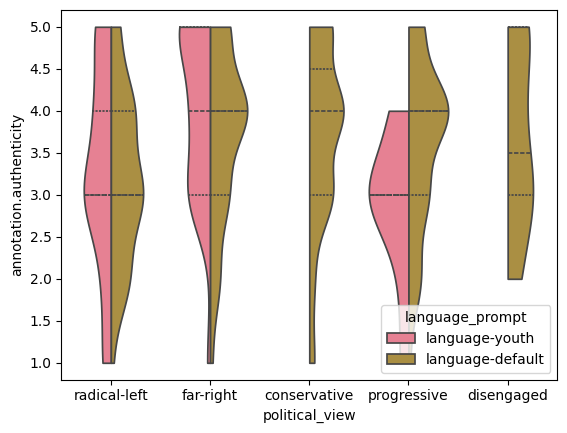

In [93]:
# language prompts per political view
#TODO sample language old and language youth
dataset_lang = dataset[dataset['language_prompt'] != 'language-old']
ax = sns.violinplot(
    data=dataset_lang,
    x="political_view",
    y="annotation.authenticity",
    hue="language_prompt",
    inner="quart",
    split=True,
    #order=[TWEET_ORDER],
    cut=0
)
sns.move_legend(ax, "lower right")
ax.get_figure().savefig(f'{OUT_PATH}/violin.language.model.auth.pdf', format="pdf", bbox_inches="tight")

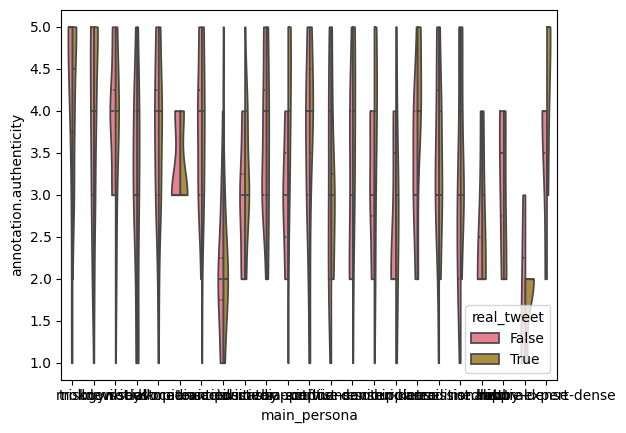

In [90]:
# real vs fake tweets
sample_personas = ["troll", "devilsadvocate", "know-it-all"]
ax = sns.violinplot(
    data=dataset,
    x="sampl",
    y="annotation.authenticity",
    hue="real_tweet",
    inner="quart",
    split=True,
    #order=[TWEET_ORDER],
    cut=0
)
sns.move_legend(ax, "lower right")
ax.get_figure().savefig(f'{OUT_PATH}/violin.language.model.auth.pdf', format="pdf", bbox_inches="tight")